In [7]:
import importlib

In [8]:
import tasks

In [9]:
task = 'normals'

In [10]:
target_task = importlib.import_module(f'tasks.{task}')

In [11]:
target_task.cfg['eval_dir']

'eval/normals'

In [ ]:
target_task.cfg['weights_file']

In [12]:
cfg_loader = target_task.CfgLoader()

In [13]:
cfg = cfg_loader.get_cfg('cpu')

In [14]:
image_dir = cfg['image_dir']

In [15]:
image_dir

'out'

In [16]:
dataset = cfg['dataset']

In [17]:
img_num = 0

In [18]:
img, target = dataset[img_num]

In [19]:
import sys

In [20]:
print(sys.executable)

/home/agrippa/anaconda3/envs/relighting_pytorch_source/bin/python


In [41]:
import matplotlib.pyplot as plt

In [42]:
import matplotlib.image as mpimg

In [43]:
import numpy as np

In [19]:
img.shape

torch.Size([3, 128, 128])

In [44]:
import torchvision

In [46]:
to_img = (lambda x: (0.5*(x+1)).clamp(0.0,1.0))

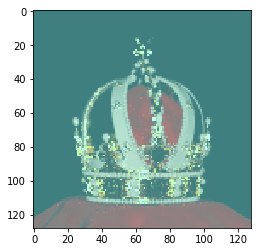

In [22]:
img_plot = plt.imshow(np.transpose(to_img(img).numpy(), (1,2,0)))

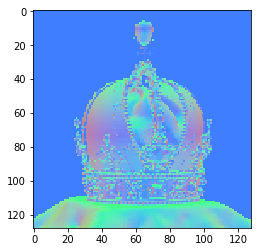

In [23]:
img_plot = plt.imshow(np.transpose(to_img(target).numpy(), (1,2,0)))

In [24]:
model = cfg['model']

In [25]:
weights_file = cfg['weights_file']

In [26]:
import torch

In [27]:
model.load_state_dict(torch.load(f'./{weights_file}'))

In [28]:
model.eval()

EncoderDecoder(
  (encoder): Resnet11Encoder128x128(
    (resnet): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1)

In [29]:
from torch.autograd import Variable

In [30]:
img.view(1,3,128,128).shape

torch.Size([1, 3, 128, 128])

In [31]:
output = model(img.view(1,3,128,128).cuda())

In [32]:
output.shape

torch.Size([1, 3, 128, 128])

In [33]:
output = output.cpu().detach().squeeze()

In [34]:
output.shape

torch.Size([3, 128, 128])

In [35]:
np_output = to_img(output).numpy()

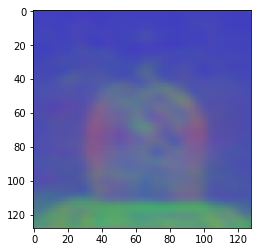

In [36]:
img_plot = plt.imshow(np.transpose(to_img(output).numpy(), (1,2,0)))

In [37]:
dataset.flat_cfg[img_num]

{'at': [3.72811, 87.9981, -82.1874],
 'color': [10000000, 10000000, 10000000],
 'eye': [61.41559999999998, 102.11, -1325.25],
 'fov': 10.1592,
 'light': [61.4156, 102.11, -1325.25],
 'size': [128, 128],
 'spp': 128,
 'up': [-0.0005256740209828103, 0.9999357047659718, 0.011327400452123822],
 'normals': 'normal_0000.png',
 'rendering': 'out-0000-0000.png',
 'i': '0',
 'j': '0'}

In [38]:
criterion = cfg['criterion']

In [39]:
loss = criterion(output, target)

In [40]:
loss

tensor(0.2114)

In [25]:
cfg['training_indices']

[745,
 137,
 377,
 388,
 824,
 767,
 712,
 584,
 506,
 706,
 334,
 549,
 352,
 787,
 570,
 78,
 29,
 298,
 843,
 247,
 752,
 307,
 165,
 575,
 178,
 722,
 65,
 141,
 265,
 851,
 846,
 423,
 331,
 820,
 987,
 685,
 961,
 221,
 959,
 235,
 732,
 192,
 1015,
 49,
 811,
 2,
 558,
 371,
 923,
 249,
 720,
 365,
 1018,
 915,
 33,
 259,
 204,
 344,
 590,
 380,
 77,
 84,
 306,
 82,
 946,
 935,
 424,
 533,
 527,
 557,
 296,
 5,
 428,
 493,
 97,
 513,
 519,
 887,
 281,
 266,
 445,
 405,
 321,
 834,
 895,
 536,
 118,
 933,
 250,
 361,
 478,
 9,
 196,
 620,
 81,
 926,
 967,
 636,
 239,
 310,
 211,
 760,
 381,
 604,
 227,
 971,
 497,
 919,
 177,
 516,
 944,
 522,
 601,
 669,
 7,
 155,
 813,
 1013,
 596,
 422,
 796,
 581,
 355,
 593,
 994,
 582,
 442,
 544,
 598,
 1021,
 980,
 481,
 228,
 1003,
 746,
 212,
 79,
 148,
 302,
 479,
 346,
 532,
 430,
 43,
 816,
 133,
 951,
 311,
 750,
 467,
 807,
 0,
 316,
 911,
 937,
 758,
 817,
 973,
 448,
 172,
 125,
 420,
 844,
 970,
 922,
 90,
 960,
 181,
 363,
 274

In [28]:
dataset = cfg['dataset']

In [30]:
sampler = cfg['training_sampler']

In [31]:
shuffle = cfg['shuffle']

In [33]:
from torch.utils.data import DataLoader

In [34]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=shuffle, sampler = sampler)

In [35]:
shuffle

False

In [37]:
dataloader_iter = dataloader.__iter__()

In [38]:
img0, target0 = next(dataloader_iter)

In [39]:
img0.shape

torch.Size([1, 3, 128, 128])

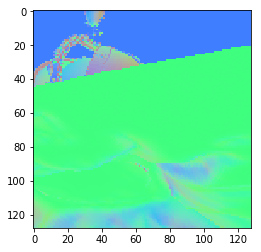

In [48]:
img0_plot = plt.imshow(np.transpose(to_img(target0.squeeze()).numpy(), (1,2,0)))

In [49]:
sampler.indices

[762,
 185,
 774,
 11,
 445,
 324,
 883,
 835,
 737,
 974,
 698,
 914,
 746,
 459,
 106,
 320,
 166,
 146,
 340,
 414,
 278,
 852,
 373,
 963,
 331,
 330,
 303,
 946,
 421,
 691,
 239,
 467,
 480,
 547,
 816,
 8,
 461,
 78,
 443,
 561,
 268,
 951,
 619,
 813,
 729,
 832,
 984,
 636,
 620,
 592,
 788,
 117,
 241,
 823,
 796,
 170,
 893,
 895,
 624,
 924,
 372,
 470,
 16,
 750,
 397,
 90,
 911,
 927,
 116,
 583,
 672,
 259,
 601,
 670,
 346,
 450,
 752,
 808,
 353,
 614,
 575,
 553,
 105,
 615,
 85,
 785,
 306,
 384,
 35,
 521,
 27,
 760,
 206,
 216,
 661,
 673,
 12,
 628,
 768,
 1013,
 933,
 721,
 173,
 150,
 727,
 524,
 897,
 61,
 982,
 487,
 145,
 69,
 446,
 972,
 782,
 780,
 18,
 899,
 573,
 121,
 431,
 6,
 511,
 783,
 230,
 939,
 17,
 892,
 402,
 888,
 316,
 164,
 640,
 182,
 988,
 915,
 248,
 41,
 227,
 502,
 153,
 56,
 253,
 180,
 866,
 802,
 745,
 570,
 24,
 428,
 692,
 991,
 430,
 980,
 873,
 355,
 317,
 47,
 769,
 916,
 176,
 52,
 92,
 968,
 604,
 191,
 313,
 806,
 685,
 40,
 9

In [50]:
cfg['training_indices'].index(762)

435